In [59]:
import pandas as pd
import pickle
import numpy as np
import statistics
import matplotlib

In [60]:
all_anams = pickle.load(open('../data/anamnesis/source/almazov_anamnesis_corpus/combined/all_anamnesis.pickle', 'rb'))

In [61]:
list_of_word_size = list(map(lambda x: len(x), all_anams))

In [62]:
data = pd.DataFrame(list_of_word_size, columns=["size"], dtype=int)

In [63]:
data["texts"] = all_anams

In [64]:
data.isnull().values.any()

False

In [65]:
data

,size,texts
0,27,"[страдать, перенести, последний, ухудшение, ко..."
1,148,"[год, артериальный, гипертензия, максимальный,..."
2,169,"[пациент, год, длительный, анамнез, гипертонич..."
3,115,"[год, артериальный, гипертензия, максимальный,..."
4,58,"[считать, здоровый, ада, редкий, измерение, ст..."
...,...,...
2677,70,"[год, отмечать, подъём, ст, привычный, цифра, ..."
2678,126,"[ага, год, максимальный, цифра, ада, ст, привы..."
2679,40,"[длительный, время, страдать, гб, постоянный, ..."
2680,45,"[артериальный, давление, повышаться, максималь..."


In [66]:
data.describe()

,size
count,2682.000000
mean,76.217375
std,63.156078
min,1.000000
25%,37.000000
50%,63.000000
75%,104.000000
max,1060.000000


In [67]:
data["size"].mean()

76.21737509321402

In [68]:
quantile_levels = [.25,.5,.75,.9,.95,.99]

In [69]:
data_quantiles = data.quantile(quantile_levels)

In [70]:
data_quantiles

,size
0.25,37.00
0.50,63.00
0.75,104.00
0.90,148.90
0.95,188.95
0.99,275.00


WTF??? Why so many texts with ~0 words and what is text with more 1000 words???

<AxesSubplot:ylabel='Frequency'>

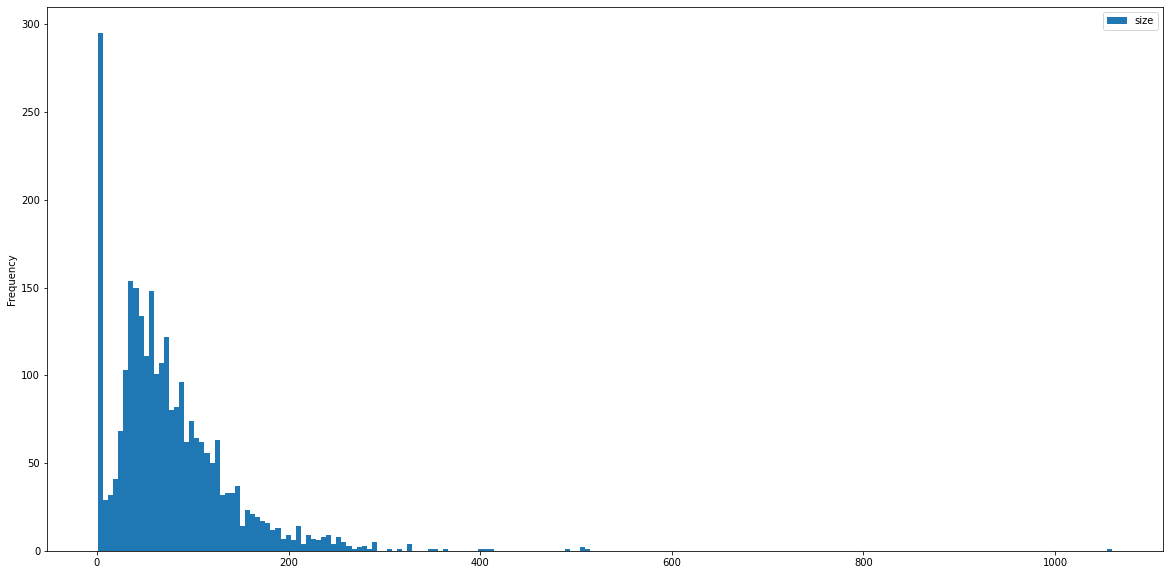

In [80]:
data.plot.hist(bins=200, figsize=(20,10))

<AxesSubplot:>

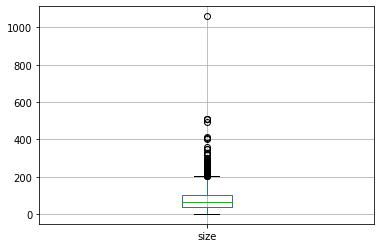

In [72]:
data.boxplot()

In [73]:
three_words_data = data[data["size"] == 3]

In [74]:
three_words_data["texts"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[анамнез, ознакомить, дополнение]     159
[история, болезнь, ознакомить]          5
[анмнез, ознакомить, дополнение]        2
[анамнез, заболевание, ознакомить]      2
[анмез, ознакомить, дополненйя]         1
[анамнез, знакомить, дополнение]        1
[анмнез, ознаокмить, дополнение]        1
[анамнез, ознакамить, дополнение]       1
[анамнез, ознакомить, дополненний]      1
[история, болезнь, оззнакомить]         1
[анамнез, знакомый, дополнение]         1
[анамнез, ознаокмить, дополнение]       1
[анамнез, озноакомить, дополнение]      1
[анамнез, ознакомить, дополонение]      1
[анамнез, ознакмить, дополнение]        1
Name: texts, dtype: int64

So it's seems corpus is raw data. It must be filtered.

In [75]:
all_anam = pickle.load(open('../data/anamnesis/source/almazov_anamnesis_corpus/combined/all_anam.pickle', 'rb'))
all_anam

['страдать',
 'перенести',
 'последний',
 'ухудшение',
 'конец',
 'май',
 'год',
 'отметить',
 'затяжной',
 'ангинозный',
 'эпизод',
 'фон',
 'стабильный',
 'состояние',
 'отметить',
 'выразить',
 'давящий',
 'боль',
 'грудина',
 'купировать',
 'нитрат',
 'больной',
 'вызвать',
 'бригада',
 'боль',
 'купировать',
 'морфин',
 'год',
 'артериальный',
 'гипертензия',
 'максимальный',
 'цифра',
 'ада',
 'ст',
 'привычный',
 'цифра',
 'ада',
 'ст',
 'год',
 'предшествовать',
 'стенокардия',
 'перенести',
 'инфаркт',
 'миокард',
 'неуточнить',
 'локализация',
 ' справка',
 'дальнейший',
 'боль',
 'грудной',
 'клетка',
 'давящий',
 'характер',
 'нагрузка',
 'возраст',
 'год',
 'отмечать',
 'эпизод',
 'частый',
 'ритмичный',
 'сердцебиение',
 'сопровождаться',
 'резка',
 'слабость',
 'потеря',
 'сознание',
 'выполнить',
 'ав соединение',
 'год',
 'мурманск',
 'выполнить',
 'коронарография',
 'ангиопластик',
 'стентирование',
 ' установить',
 'рекомендовать',
 'терапия',
 'принимать',
 'боль',


In [76]:
len(all_anam)

204415

In [78]:
all_anam_words = pd.DataFrame(all_anam, columns=["word"])

In [79]:
all_anam_words.value_counts()

word                
боль                    4304
год                     3293
ада                     2628
ст                      2590
выполнить               2344
                        ... 
нормальногосинусовый       1
нормализовать              1
беспоклоить                1
беспокоятс                 1
     т                     1
Length: 9630, dtype: int64

In [83]:
print(data[data["size"] == max(data["size"])]["texts"].to_numpy())

[list(['анамнез', 'гипертонический', 'болезнь', 'последний', 'год', 'постоянный', 'антигипертензивный', 'терапия', ' таб', 'престариум', 'мг сать', 'дебют', 'клиника', 'быть', 'диагностировать', 'q инфаркт', 'миокард', 'задне боков', 'локализация', 'быть', 'госпитализировать', 'витебский', 'областной', 'диспансер', 'провести', 'течение', 'инфаркт', 'миокард', 'осложниться', 'устойчивый', 'пароксизм', 'транзиторный', 'синдром', 'фредерик', 'устойчивый', 'пароксизм', 'купировать', 'кардиогенный', 'шок', 'ст', 'эпизод', 'олжный', 'пациент', 'быть', 'перевести', 'реваскуляризация', 'миокард', 'выполнить', 'вентрикулография', 'ртс', 'стентирование', 'результат', 'левый', 'тип', 'ствол', 'стеноз', 'пмж', 'стеноз', 'стеноз', 'рассыпной', 'тип', 'вентрикулография', 'ст', 'данные', 'эхо кг', 'зона', 'акинезия', 'боков', 'нижний', 'нижний боков', 'стенка', 'весь', 'протяжение', 'ст', 'ст', 'обсудить', 'котин', 'наш', 'рекомендовать', 'контроль', 'эхо кг', 'месяц', 'уточнение', 'степень', 'динами